# IPL Data Analysis & Visualization – A Deep Dive into Team and Player Performance



## Team-Level Insights
### 1.Which team has won the most matches?



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
matches=pd.read_csv(r"R:\projects\IPL-DATA-ANALYSIS\Data\matches.csv")

In [6]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches["winner"]=matches["winner"].replace({"Rising Pune Supergiants":"Rising Pune Supergiant"})

In [8]:
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
data_copy=matches.copy()

In [10]:
data_copy.dropna(subset=["winner"],inplace=True)

In [11]:
data_copy.shape

(752, 18)

In [12]:
data_copy["winner"]=data_copy["winner"].replace({"Rising Pune Supergiants":"Rising Pune Supergiant"})

In [13]:
frequency=data_copy.groupby("winner")["winner"].count()
frequency.name="win"
df = frequency.reset_index()
df.columns = ['team', 'wincount']
df









,team,wincount
0,Chennai Super Kings,100
1,Deccan Chargers,29
2,Delhi Capitals,10
3,Delhi Daredevils,67
4,Gujarat Lions,13
5,Kings XI Punjab,82
6,Kochi Tuskers Kerala,6
7,Kolkata Knight Riders,92
8,Mumbai Indians,109
9,Pune Warriors,12


In [14]:
index=df["wincount"].idxmax()
df.iat[index,0]


'Mumbai Indians'

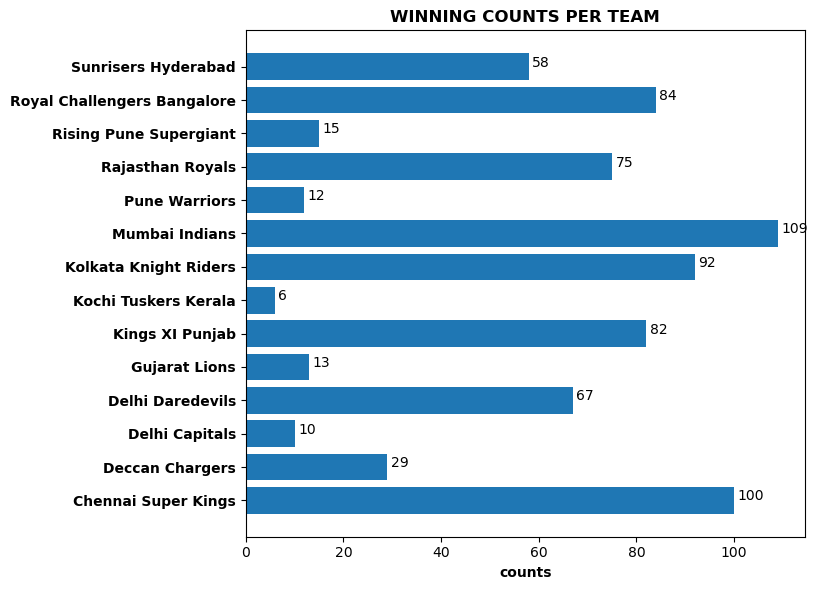

In [15]:
plt.figure(figsize=(8, 6))
plt.barh(df["team"],df["wincount"])

for i in range(len(df["team"])):
    plt.text(df['wincount'][i]+0.70,i,str(df['wincount'][i]))


plt.title("WINNING COUNTS PER TEAM",fontsize=12,fontweight="bold",color="black")
plt.xlabel("counts",fontsize=10,fontweight="bold")
plt.tight_layout()
plt.xticks(color="black")
plt.yticks(color="black",fontweight="bold")
plt.savefig("wining_count.jpg",dpi=300)
plt.show()

### 2.Which team has the best win percentage?

In [40]:
delivery=pd.read_csv(r"R:\projects\IPL-DATA-ANALYSIS\Data\deliveries.csv")
df=delivery.copy()

In [41]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [42]:
data_copy.head()


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [43]:
data_copy.shape

(752, 18)

In [44]:
data_copy.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            634
dtype: int64

In [45]:
s=pd.concat([data_copy["team1"],data_copy["team2"]])
df =s.to_frame(name="teams")
df = df.reset_index(drop=True)
df





,teams
0,Sunrisers Hyderabad
1,Mumbai Indians
2,Gujarat Lions
3,Rising Pune Supergiant
4,Royal Challengers Bangalore
...,...
1499,Mumbai Indians
1500,Mumbai Indians
1501,Delhi Capitals
1502,Chennai Super Kings


In [46]:
df["teams"]=df["teams"].replace({"Rising Pune Supergiants":"Rising Pune Supergiant"})

In [47]:
match_play=df.groupby("teams")["teams"].count()
match_play




teams
Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               159
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   45
Rajasthan Royals               145
Rising Pune Supergiant          30
Royal Challengers Bangalore    177
Sunrisers Hyderabad            108
Name: teams, dtype: int64

In [48]:
frequency

winner
Chennai Super Kings            100
Deccan Chargers                 29
Delhi Capitals                  10
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           92
Mumbai Indians                 109
Pune Warriors                   12
Rajasthan Royals                75
Rising Pune Supergiant          15
Royal Challengers Bangalore     84
Sunrisers Hyderabad             58
Name: win, dtype: int64

In [49]:
percent=pd.concat([frequency,match_play],axis=1)
percent
percent=percent.rename(columns={"teams":"matches"})
percent

,win,matches
Chennai Super Kings,100,164
Deccan Chargers,29,75
Delhi Capitals,10,16
Delhi Daredevils,67,159
Gujarat Lions,13,30
Kings XI Punjab,82,176
Kochi Tuskers Kerala,6,14
Kolkata Knight Riders,92,178
Mumbai Indians,109,187
Pune Warriors,12,45


In [50]:
percent["WinPercentage"]=[((percent["win"].iloc[i]/percent["matches"].iloc[i])*100).round(1) for i in range(len(percent))]
percent




,win,matches,WinPercentage
Chennai Super Kings,100,164,61.0
Deccan Chargers,29,75,38.7
Delhi Capitals,10,16,62.5
Delhi Daredevils,67,159,42.1
Gujarat Lions,13,30,43.3
Kings XI Punjab,82,176,46.6
Kochi Tuskers Kerala,6,14,42.9
Kolkata Knight Riders,92,178,51.7
Mumbai Indians,109,187,58.3
Pune Warriors,12,45,26.7


In [51]:
percent["teams"]=percent.index
percent

,win,matches,WinPercentage,teams
Chennai Super Kings,100,164,61.0,Chennai Super Kings
Deccan Chargers,29,75,38.7,Deccan Chargers
Delhi Capitals,10,16,62.5,Delhi Capitals
Delhi Daredevils,67,159,42.1,Delhi Daredevils
Gujarat Lions,13,30,43.3,Gujarat Lions
Kings XI Punjab,82,176,46.6,Kings XI Punjab
Kochi Tuskers Kerala,6,14,42.9,Kochi Tuskers Kerala
Kolkata Knight Riders,92,178,51.7,Kolkata Knight Riders
Mumbai Indians,109,187,58.3,Mumbai Indians
Pune Warriors,12,45,26.7,Pune Warriors


In [52]:
percent.reset_index(drop=True,inplace=True)
percent

,win,matches,WinPercentage,teams
0,100,164,61.0,Chennai Super Kings
1,29,75,38.7,Deccan Chargers
2,10,16,62.5,Delhi Capitals
3,67,159,42.1,Delhi Daredevils
4,13,30,43.3,Gujarat Lions
5,82,176,46.6,Kings XI Punjab
6,6,14,42.9,Kochi Tuskers Kerala
7,92,178,51.7,Kolkata Knight Riders
8,109,187,58.3,Mumbai Indians
9,12,45,26.7,Pune Warriors


In [53]:
cols=["teams"]+[col for col in percent.columns if col !="teams"]
percent=percent[cols]

In [54]:
percent

,teams,win,matches,WinPercentage
0,Chennai Super Kings,100,164,61.0
1,Deccan Chargers,29,75,38.7
2,Delhi Capitals,10,16,62.5
3,Delhi Daredevils,67,159,42.1
4,Gujarat Lions,13,30,43.3
5,Kings XI Punjab,82,176,46.6
6,Kochi Tuskers Kerala,6,14,42.9
7,Kolkata Knight Riders,92,178,51.7
8,Mumbai Indians,109,187,58.3
9,Pune Warriors,12,45,26.7


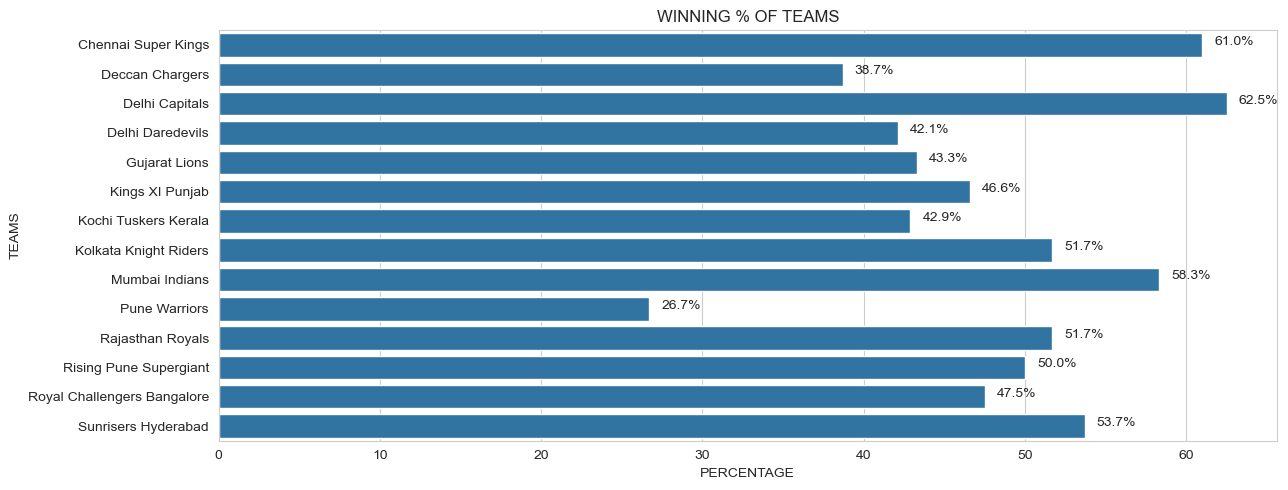

In [105]:
plt.figure(figsize=(13,5))
sns.barplot(x="WinPercentage",y="teams",data=percent)

for i in range(len(percent["WinPercentage"])):
    plt.text(percent['WinPercentage'][i]+0.75,i,f"{percent['WinPercentage'][i]:.1f}%")

plt.xlabel("PERCENTAGE")
plt.ylabel("TEAMS")
plt.title("WINNING % OF TEAMS")
plt.tight_layout()
plt.savefig("winning_percentage_plot.jpg", dpi=300)
plt.show()


### How often does toss winner = match winner?

In [56]:
toss=matches.copy()

In [57]:
toss.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [58]:
toss=toss[["toss_winner","winner"]]
toss

,toss_winner,winner
0,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Rising Pune Supergiant,Rising Pune Supergiant
2,Kolkata Knight Riders,Kolkata Knight Riders
3,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...
751,Mumbai Indians,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians
753,Delhi Capitals,Delhi Capitals
754,Chennai Super Kings,Chennai Super Kings


In [59]:
toss.isnull().sum()

toss_winner    0
winner         4
dtype: int64

In [60]:
toss.dropna(subset="winner",inplace=True)

In [61]:
toss.isnull().sum()

toss_winner    0
winner         0
dtype: int64

In [62]:
count=0
for i in toss.index:
    if toss["toss_winner"][i]==toss["winner"][i]:
        count +=1

l=len(toss)
percentage=(count/l)*100
print("Matches where toss winner = match winner:",count)
print("total matches",l)
print("percentage how often toss winner is match winner",round(percentage,2))


        
        
        

Matches where toss winner = match winner: 390
total matches 752
percentage how often toss winner is match winner 51.86


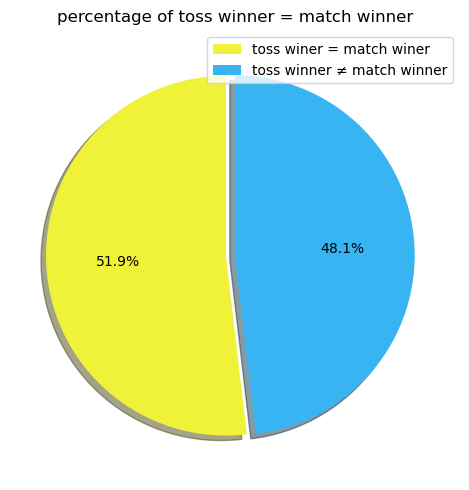

In [63]:
plt.figure(figsize=[13,5])
labels=["toss winer = match winer","toss winner ≠ match winner"]
explode=[0.05,0]
sizes=[count,l-count]
plt.pie(sizes,labels=None,colors=["#EFF238","#38B4F2"],explode=explode,shadow=True,autopct="%1.1f%%",startangle=90)
plt.title("percentage of toss winner = match winner")
plt.legend(labels,loc="upper right")
plt.tight_layout()

plt.savefig("pietosswinner.jpg",dpi=300)

plt.show()

### Which team performs best when batting first vs chasing?

In [64]:
batting=matches.copy()

In [65]:
batting.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [66]:
batting["winner"]=batting["winner"].replace({"Rising Pune Supergiants":"Rising Pune Supergiant"})
batting["toss_winner"]=batting["toss_winner"].replace({"Rising Pune Supergiants":"Rising Pune Supergiant"})

In [67]:
batting.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [68]:
toss_count=batting.groupby("toss_winner")["toss_winner"].count()
toss_count

toss_winner
Chennai Super Kings            89
Deccan Chargers                43
Delhi Capitals                 10
Delhi Daredevils               80
Gujarat Lions                  15
Kings XI Punjab                81
Kochi Tuskers Kerala            8
Kolkata Knight Riders          92
Mumbai Indians                 98
Pune Warriors                  20
Rajasthan Royals               80
Rising Pune Supergiant         13
Royal Challengers Bangalore    81
Sunrisers Hyderabad            46
Name: toss_winner, dtype: int64

In [69]:
type(toss_count)

pandas.core.series.Series

In [70]:
toss_count.name = 'win'                 
toss_count = toss_count.reset_index()     
toss_count.columns = ['team', 'win_toss']       

print(toss_count)



                           team  win_toss
0           Chennai Super Kings        89
1               Deccan Chargers        43
2                Delhi Capitals        10
3              Delhi Daredevils        80
4                 Gujarat Lions        15
5               Kings XI Punjab        81
6          Kochi Tuskers Kerala         8
7         Kolkata Knight Riders        92
8                Mumbai Indians        98
9                 Pune Warriors        20
10             Rajasthan Royals        80
11       Rising Pune Supergiant        13
12  Royal Challengers Bangalore        81
13          Sunrisers Hyderabad        46


In [71]:
batting.shape

(756, 18)

In [72]:
mapping={}
for i in batting.index:
    if batting["toss_winner"][i]==batting["winner"][i] and batting["toss_decision"][i]=="bat":
        mapping[batting["toss_winner"][i]]=mapping.get(batting["toss_winner"][i],0)+1

print(mapping)
        

{'Royal Challengers Bangalore': 9, 'Delhi Daredevils': 11, 'Sunrisers Hyderabad': 8, 'Mumbai Indians': 25, 'Chennai Super Kings': 30, 'Rajasthan Royals': 15, 'Kings XI Punjab': 6, 'Kolkata Knight Riders': 15, 'Deccan Chargers': 11, 'Pune Warriors': 3, 'Delhi Capitals': 1}


In [73]:
bating_first=pd.DataFrame(list(mapping.items()),columns=["team","win_bat"])
bating_first

,team,win_bat
0,Royal Challengers Bangalore,9
1,Delhi Daredevils,11
2,Sunrisers Hyderabad,8
3,Mumbai Indians,25
4,Chennai Super Kings,30
5,Rajasthan Royals,15
6,Kings XI Punjab,6
7,Kolkata Knight Riders,15
8,Deccan Chargers,11
9,Pune Warriors,3


In [74]:
df=pd.merge(toss_count,bating_first,on="team",how="left")

In [75]:
df

,team,win_toss,win_bat
0,Chennai Super Kings,89,30.0
1,Deccan Chargers,43,11.0
2,Delhi Capitals,10,1.0
3,Delhi Daredevils,80,11.0
4,Gujarat Lions,15,NaN
5,Kings XI Punjab,81,6.0
6,Kochi Tuskers Kerala,8,NaN
7,Kolkata Knight Riders,92,15.0
8,Mumbai Indians,98,25.0
9,Pune Warriors,20,3.0


In [76]:
df["win_bat"]=df["win_bat"].fillna(0).astype(int)

In [77]:
df

,team,win_toss,win_bat
0,Chennai Super Kings,89,30
1,Deccan Chargers,43,11
2,Delhi Capitals,10,1
3,Delhi Daredevils,80,11
4,Gujarat Lions,15,0
5,Kings XI Punjab,81,6
6,Kochi Tuskers Kerala,8,0
7,Kolkata Knight Riders,92,15
8,Mumbai Indians,98,25
9,Pune Warriors,20,3


In [78]:
df["performance"]=(df["win_bat"]/df["win_toss"])*100

In [79]:
df["performance"]=df["performance"].round(2)
df

,team,win_toss,win_bat,performance
0,Chennai Super Kings,89,30,33.71
1,Deccan Chargers,43,11,25.58
2,Delhi Capitals,10,1,10.00
3,Delhi Daredevils,80,11,13.75
4,Gujarat Lions,15,0,0.00
5,Kings XI Punjab,81,6,7.41
6,Kochi Tuskers Kerala,8,0,0.00
7,Kolkata Knight Riders,92,15,16.30
8,Mumbai Indians,98,25,25.51
9,Pune Warriors,20,3,15.00


In [80]:
df = df.sort_values(by='performance', ascending=False)
df.reset_index(drop=True,inplace=True)
df

,team,win_toss,win_bat,performance
0,Chennai Super Kings,89,30,33.71
1,Deccan Chargers,43,11,25.58
2,Mumbai Indians,98,25,25.51
3,Rajasthan Royals,80,15,18.75
4,Sunrisers Hyderabad,46,8,17.39
5,Kolkata Knight Riders,92,15,16.30
6,Pune Warriors,20,3,15.00
7,Delhi Daredevils,80,11,13.75
8,Royal Challengers Bangalore,81,9,11.11
9,Delhi Capitals,10,1,10.00


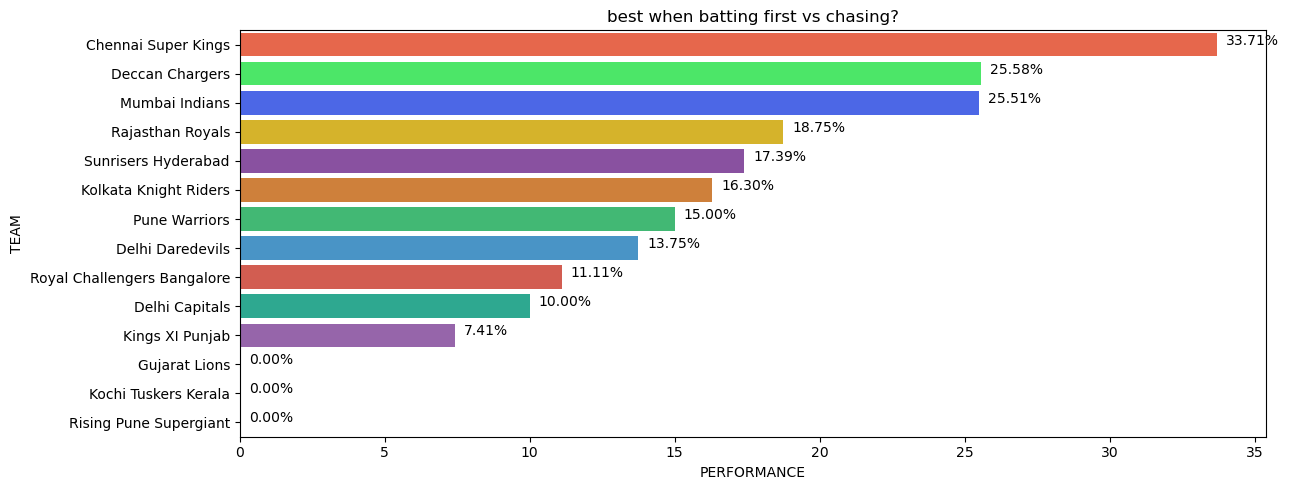

In [81]:
# graph plot

plt.figure(figsize=(13,5))
custom_colors = [
    "#FF5733", "#33FF57", "#3357FF", "#F1C40F",
    "#8E44AD", "#E67E22", "#2ECC71", "#3498DB",
    "#E74C3C", "#1ABC9C", "#9B59B6", "#34495E",
    "#16A085", "#D35400"
]



sns.barplot(y="team",x="performance",data=df,palette=custom_colors,hue="team")
plt.xlabel("PERFORMANCE")
plt.ylabel("TEAM")
plt.title("best when batting first vs chasing?")

for i in df.index:
    plt.text(df["performance"][i]+0.31,i,f"{df['performance'][i]:.2f}%")
plt.tight_layout()
plt.savefig("batVSchasing.jpg",dpi=300)
plt.show()


### Season-wise top-performing team (most wins per season)

In [82]:
season=matches[["Season","winner"]].copy()

In [83]:
season.isnull().sum()

Season    0
winner    4
dtype: int64

In [84]:
season.dropna(subset="winner",inplace=True)

In [85]:
season.isnull().sum()


Season    0
winner    0
dtype: int64

In [86]:
season

,Season,winner
0,IPL-2017,Sunrisers Hyderabad
1,IPL-2017,Rising Pune Supergiant
2,IPL-2017,Kolkata Knight Riders
3,IPL-2017,Kings XI Punjab
4,IPL-2017,Royal Challengers Bangalore
...,...,...
751,IPL-2019,Mumbai Indians
752,IPL-2019,Mumbai Indians
753,IPL-2019,Delhi Capitals
754,IPL-2019,Chennai Super Kings


In [87]:
df=season.groupby(["Season","winner"])["winner"].count().reset_index(name="win")
df

,Season,winner,win
0,IPL-2008,Chennai Super Kings,9
1,IPL-2008,Deccan Chargers,2
2,IPL-2008,Delhi Daredevils,7
3,IPL-2008,Kings XI Punjab,10
4,IPL-2008,Kolkata Knight Riders,6
...,...,...,...
95,IPL-2019,Kolkata Knight Riders,6
96,IPL-2019,Mumbai Indians,11
97,IPL-2019,Rajasthan Royals,5
98,IPL-2019,Royal Challengers Bangalore,5


In [88]:
print(df.query("Season=='IPL-2008'")["win"].max())

13


In [89]:
top_team=df.groupby("Season")["win"].idxmax()
top_team

Season
IPL-2008     6
IPL-2009    10
IPL-2010    21
IPL-2011    24
IPL-2012    38
IPL-2013    47
IPL-2014    54
IPL-2015    60
IPL-2016    75
IPL-2017    80
IPL-2018    84
IPL-2019    96
Name: win, dtype: int64

In [90]:
type(df)

pandas.core.frame.DataFrame

In [91]:
top_teams=df.loc[top_team]
print(top_teams)

      Season                 winner  win
6   IPL-2008       Rajasthan Royals   13
10  IPL-2009       Delhi Daredevils   10
21  IPL-2010         Mumbai Indians   11
24  IPL-2011    Chennai Super Kings   11
38  IPL-2012  Kolkata Knight Riders   12
47  IPL-2013         Mumbai Indians   13
54  IPL-2014        Kings XI Punjab   12
60  IPL-2015    Chennai Super Kings   10
75  IPL-2016    Sunrisers Hyderabad   11
80  IPL-2017         Mumbai Indians   12
84  IPL-2018    Chennai Super Kings   11
96  IPL-2019         Mumbai Indians   11


In [92]:
type(top_teams)
top_teams.columns=["Seasons","Team","Win"]

In [93]:
top_teams.reset_index(drop=True,inplace=True)
top_teams

,Seasons,Team,Win
0,IPL-2008,Rajasthan Royals,13
1,IPL-2009,Delhi Daredevils,10
2,IPL-2010,Mumbai Indians,11
3,IPL-2011,Chennai Super Kings,11
4,IPL-2012,Kolkata Knight Riders,12
5,IPL-2013,Mumbai Indians,13
6,IPL-2014,Kings XI Punjab,12
7,IPL-2015,Chennai Super Kings,10
8,IPL-2016,Sunrisers Hyderabad,11
9,IPL-2017,Mumbai Indians,12


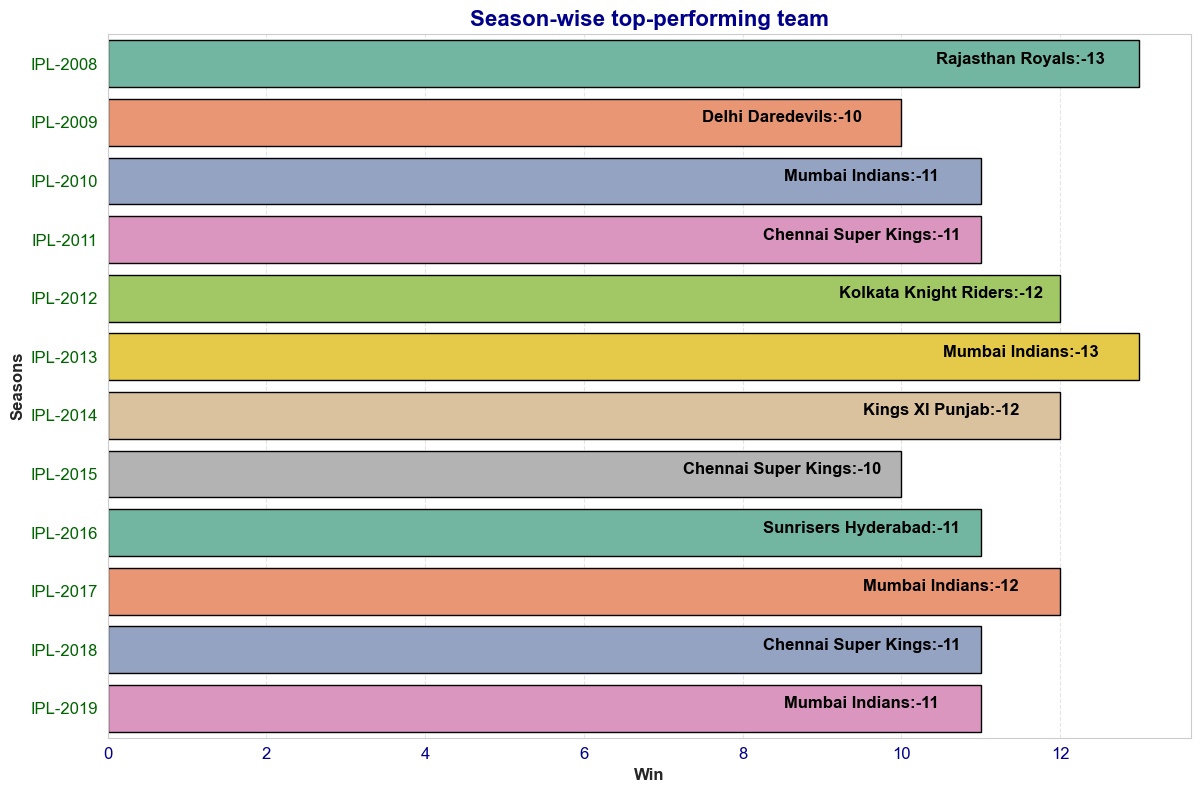

In [94]:
# plot
sns.set_style("whitegrid")

plt.figure(figsize=(12,8))
colors=sns.color_palette("Set2",len(top_teams))
sns.barplot(y="Seasons",x="Win",data=top_teams,palette=colors,hue="Seasons",edgecolor="black")

for i in top_teams.index:
    plt.text(top_teams["Win"][i]-1.50,i,f"{top_teams['Team'][i]}:-{top_teams['Win'][i]}",ha="center",fontsize=12,fontweight="bold",color="black")
    


plt.title("Season-wise top-performing team",fontsize=16,fontweight="bold",color="darkblue")
plt.xlabel("Win",fontsize=12,fontweight="bold")
plt.ylabel("Seasons",fontsize=12,fontweight="bold")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xticks(fontsize=12, color="darkblue")
plt.yticks(fontsize=12, color="darkgreen")
#sns.despine(left=True, bottom=True)
plt.savefig("season_wise_top.jpg",dpi=300)
plt.show()


### Win distribution across different venues


In [95]:
stadium=matches[["venue","winner"]].copy()

In [96]:
stadium

,venue,winner
0,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
1,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
2,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
3,Holkar Cricket Stadium,Kings XI Punjab
4,M Chinnaswamy Stadium,Royal Challengers Bangalore
...,...,...
751,Wankhede Stadium,Mumbai Indians
752,M. A. Chidambaram Stadium,Mumbai Indians
753,ACA-VDCA Stadium,Delhi Capitals
754,ACA-VDCA Stadium,Chennai Super Kings


In [97]:
stadium.isnull().sum()

venue     0
winner    4
dtype: int64

In [98]:
stadium.dropna(subset=["winner"],inplace=True)
stadium

,venue,winner
0,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
1,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
2,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
3,Holkar Cricket Stadium,Kings XI Punjab
4,M Chinnaswamy Stadium,Royal Challengers Bangalore
...,...,...
751,Wankhede Stadium,Mumbai Indians
752,M. A. Chidambaram Stadium,Mumbai Indians
753,ACA-VDCA Stadium,Delhi Capitals
754,ACA-VDCA Stadium,Chennai Super Kings


In [99]:
stadium=stadium.groupby(["venue","winner"])["winner"].count().reset_index(name="win")

In [100]:
stadium

,venue,winner,win
0,ACA-VDCA Stadium,Chennai Super Kings,1
1,ACA-VDCA Stadium,Delhi Capitals,1
2,Barabati Stadium,Deccan Chargers,3
3,Barabati Stadium,Kings XI Punjab,1
4,Barabati Stadium,Kolkata Knight Riders,3
...,...,...,...
239,Wankhede Stadium,Pune Warriors,1
240,Wankhede Stadium,Rajasthan Royals,4
241,Wankhede Stadium,Rising Pune Supergiant,3
242,Wankhede Stadium,Royal Challengers Bangalore,3


In [101]:
stadium.groupby("venue")["venue"].count()

venue
ACA-VDCA Stadium                                         2
Barabati Stadium                                         3
Brabourne Stadium                                        5
Buffalo Park                                             3
De Beers Diamond Oval                                    3
Dr DY Patil Sports Academy                               8
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      7
Dubai International Cricket Stadium                      5
Eden Gardens                                            12
Feroz Shah Kotla                                        13
Feroz Shah Kotla Ground                                  4
Green Park                                               3
Himachal Pradesh Cricket Association Stadium             4
Holkar Cricket Stadium                                   5
IS Bindra Stadium                                        3
JSCA International Stadium Complex                       5
Kingsmead                                         

In [102]:
stadium=stadium.pivot_table(index='venue',columns='winner',values='win')


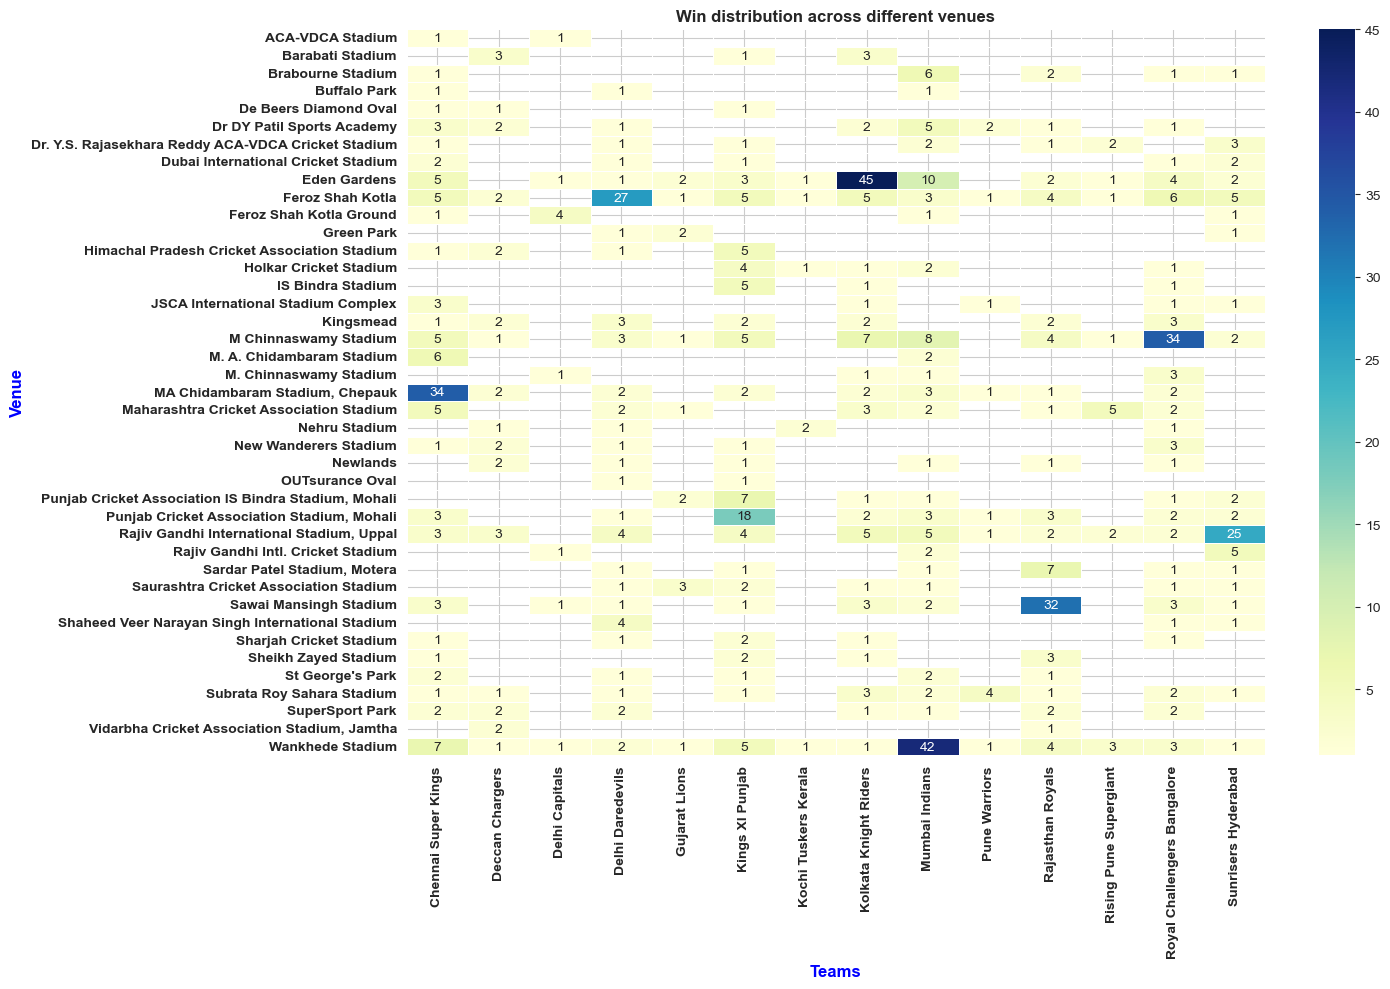

In [103]:
plt.figure(figsize=(15, 10))
sns.heatmap(stadium, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.title("Win distribution across different venues",fontsize=12,fontweight="bold")
plt.xlabel("Teams",fontsize=12,fontweight="bold",color="blue")
plt.ylabel("Venue",fontsize=12,fontweight="bold",color="blue")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.tight_layout()
plt.savefig("venues_win.jpg",dpi=300)
plt.show()
